Below are the guidelines for the Project Notes-I:

Review Parameters	Points
1) Introduction of the business problem	4
a) Defining problem statement	 
b) Need of the study/project	 
c) Understanding business/social opportunity	 
 	 
2)Data Report	2
a) Understanding how data was collected in terms of time, frequency and methodology	 
b) Visual inspection of data (rows, columns, descriptive details)	 
c) Understanding of attributes (variable info, renaming if required)	 
 	 
3) Exploratory data analysis	10
a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)	 
b) Bivariate analysis (relationship between different variables , correlations)	 
a) Removal of unwanted variables (if applicable)	 
b) Missing Value treatment (if applicable)	 
d) Outlier treatment (if required)	 
e) Variable transformation (if applicable)	 
f) Addition of new variables (if required)	 
 	 
4) Business insights from EDA 	4
a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business	 
b) Any business insights using clustering  (if applicable)	 
c) Any other business insights	 
 	 
Total	20

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_excel('Sports Data.xlsx',sheet_name='Sports data for DSBA')

In [3]:
df.head(5)

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [4]:
df.drop('Audience_number',axis=1,inplace=True)
df.drop('Game_number',axis=1,inplace=True)

In [5]:
df.shape

(2930, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Result                  2930 non-null   object 
 1   Avg_team_Age            2833 non-null   float64
 2   Match_light_type        2878 non-null   object 
 3   Match_format            2860 non-null   object 
 4   Bowlers_in_team         2848 non-null   float64
 5   Wicket_keeper_in_team   2930 non-null   int64  
 6   All_rounder_in_team     2890 non-null   float64
 7   First_selection         2871 non-null   object 
 8   Opponent                2894 non-null   object 
 9   Season                  2868 non-null   object 
 10  Offshore                2866 non-null   object 
 11  Max_run_scored_1over    2902 non-null   float64
 12  Max_wicket_taken_1over  2930 non-null   int64  
 13  Extra_bowls_bowled      2901 non-null   float64
 14  Min_run_given_1over     2930 non-null   

In [7]:
df['Batsmen_in_Team']=11-df['Bowlers_in_team']-df['Wicket_keeper_in_team']-df['All_rounder_in_team']

In [8]:
df['First_selection'].value_counts()

Bowling    1722
Batting    1138
Bat          11
Name: First_selection, dtype: int64

In [9]:
df=df.replace(to_replace="Bat",value="Batting")

In [10]:
df['First_selection'].value_counts()

Bowling    1722
Batting    1149
Name: First_selection, dtype: int64

In [11]:
df['Result'].value_counts()

Win     2457
Loss     473
Name: Result, dtype: int64

In [12]:
df['Match_format'].value_counts()

ODI      1865
T20       864
Test      125
20-20       6
Name: Match_format, dtype: int64

In [13]:
df=df.replace(to_replace ="20-20",value ="T20")

In [14]:
df['Match_format'].value_counts()

ODI     1865
T20      870
Test     125
Name: Match_format, dtype: int64

In [15]:
df['Match_light_type'].value_counts()

Day              2041
Day and Night     541
Night             296
Name: Match_light_type, dtype: int64

In [16]:
df['Offshore'].value_counts()

No     2057
Yes     809
Name: Offshore, dtype: int64

In [17]:
df.describe()

,Avg_team_Age,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Batsmen_in_Team
count,2833.000000,2848.000000,2930.0,2890.000000,2902.000000,2930.000000,2901.000000,2930.000000,2903.000000,2896.000000,2930.000000,2902.000000,2808.000000
mean,29.242852,2.913624,1.0,2.722491,15.199862,2.713993,11.252671,1.952560,2.762659,8.669199,4.229693,65.889387,4.368234
std,2.264230,1.023907,0.0,1.092699,3.661010,1.080623,7.780829,1.678332,0.705759,5.003525,3.626108,20.331614,1.475032
min,12.000000,1.000000,1.0,1.000000,11.000000,1.000000,0.000000,0.000000,1.000000,6.000000,0.000000,30.000000,1.000000
25%,30.000000,2.000000,1.0,2.000000,12.000000,2.000000,6.000000,0.000000,2.000000,6.000000,2.000000,48.000000,3.000000
50%,30.000000,3.000000,1.0,3.000000,14.000000,3.000000,10.000000,2.000000,3.000000,6.000000,3.000000,66.000000,4.000000
75%,30.000000,4.000000,1.0,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,9.250000,7.000000,84.000000,5.000000
max,70.000000,5.000000,1.0,4.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,100.000000,8.000000


In [18]:
df['Opponent'].value_counts()

South Africa    640
Kenya           576
Srilanka        513
England         283
Pakistan        253
Bangladesh      204
Zimbabwe        163
West Indies     158
Australia       104
Name: Opponent, dtype: int64

In [19]:
df['Season'].value_counts(normalize=True)*100

Rainy     45.641562
Summer    32.008368
Winter    22.350070
Name: Season, dtype: float64

In [20]:
df.dtypes

Result                     object
Avg_team_Age              float64
Match_light_type           object
Match_format               object
Bowlers_in_team           float64
Wicket_keeper_in_team       int64
All_rounder_in_team       float64
First_selection            object
Opponent                   object
Season                     object
Offshore                   object
Max_run_scored_1over      float64
Max_wicket_taken_1over      int64
Extra_bowls_bowled        float64
Min_run_given_1over         int64
Min_run_scored_1over      float64
Max_run_given_1over       float64
extra_bowls_opponent        int64
player_highest_run        float64
Players_scored_zero        object
player_highest_wicket      object
Batsmen_in_Team           float64
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Result                  2930 non-null   object 
 1   Avg_team_Age            2833 non-null   float64
 2   Match_light_type        2878 non-null   object 
 3   Match_format            2860 non-null   object 
 4   Bowlers_in_team         2848 non-null   float64
 5   Wicket_keeper_in_team   2930 non-null   int64  
 6   All_rounder_in_team     2890 non-null   float64
 7   First_selection         2871 non-null   object 
 8   Opponent                2894 non-null   object 
 9   Season                  2868 non-null   object 
 10  Offshore                2866 non-null   object 
 11  Max_run_scored_1over    2902 non-null   float64
 12  Max_wicket_taken_1over  2930 non-null   int64  
 13  Extra_bowls_bowled      2901 non-null   float64
 14  Min_run_given_1over     2930 non-null   

In [22]:
df.isnull().sum().sum()

830

In [23]:
df.dtypes.value_counts()

float64    9
object     9
int64      4
dtype: int64

In [24]:
categoriacl_features=[]
numerical_features=[]
for i in df.columns:
    if df[i].dtype=="object":
        categoriacl_features.append(i)
    else:
        numerical_features.append(i)
print(categoriacl_features) 
print(numerical_features)

['Result', 'Match_light_type', 'Match_format', 'First_selection', 'Opponent', 'Season', 'Offshore', 'Players_scored_zero', 'player_highest_wicket']
['Avg_team_Age', 'Bowlers_in_team', 'Wicket_keeper_in_team', 'All_rounder_in_team', 'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent', 'player_highest_run', 'Batsmen_in_Team']


## Check for duplicate data

In [25]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 932


,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,...,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Batsmen_in_Team
9,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,Summer,...,1,0.0,0,3.0,6.0,0,69.0,2,1,3.0
12,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,Summer,...,4,0.0,0,3.0,6.0,0,80.0,3,1,6.0
13,Win,24.0,Night,ODI,3.0,1,4.0,Batting,Srilanka,Summer,...,3,0.0,5,4.0,6.0,0,97.0,3,1,3.0
14,Loss,24.0,Day and Night,T20,2.0,1,2.0,Batting,Zimbabwe,Summer,...,3,0.0,0,4.0,6.0,0,70.0,3,1,6.0
15,Win,24.0,Night,ODI,3.0,1,2.0,Batting,Kenya,Summer,...,3,0.0,4,1.0,6.0,0,33.0,3,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,Win,30.0,Day,T20,2.0,1,1.0,Batting,South Africa,Rainy,...,3,10.0,0,3.0,10.0,7,100.0,3,2,7.0
2924,Win,30.0,Day,T20,4.0,1,2.0,Batting,South Africa,Rainy,...,1,8.0,0,2.0,6.0,3,100.0,2,2,4.0
2926,Win,30.0,Day,ODI,4.0,1,3.0,Bowling,Kenya,Summer,...,4,8.0,2,3.0,6.0,2,52.0,2,1,3.0
2928,Win,30.0,Day,ODI,4.0,1,3.0,Batting,Kenya,Rainy,...,2,20.0,2,3.0,6.0,3,98.0,3,1,3.0


In [26]:
df.groupby(['Match_format',"Match_light_type",'Offshore','Result']).agg({'Result':'count'})

Result
Match_format Match_light_type Offshore Result        
ODI          Day              No       Loss        71
                                       Win        857
                              Yes      Loss        89
                                       Win        258
             Day and Night    No       Loss        34
                                       Win        199
                              Yes      Loss        36
                                       Win         72
             Night            No       Loss         5
                                       Win        131
                              Yes      Loss        10
                                       Win         35
T20          Day              No       Loss        52
                                       Win        353
                              Yes      Loss        56
                                       Win        116
             Day and Night    No       Loss        24
                                       Win         92
                              Yes      Loss        27
                                       Win         14
             Night            No       Loss         4
                                       Win         66
                              Yes      Loss         4
                                       Win         16
Test         Day              No       Loss        10
                                       Win         55
                              Yes      Loss         6
                                       Win         18
             Day and Night    No       Loss         4
                                       Win         10
                              Yes      Loss         4
                                       Win          4
             Night            No       Win         10
                              Yes      Win          2

In [27]:
df.groupby(['Opponent','Result']).agg({'Result':'count'})

Result
Opponent     Result        
Australia    Loss        24
             Win         80
Bangladesh   Loss        10
             Win        194
England      Loss        18
             Win        265
Kenya        Loss        93
             Win        483
Pakistan     Loss        17
             Win        236
South Africa Loss       109
             Win        531
Srilanka     Loss       124
             Win        389
West Indies  Loss         4
             Win        154
Zimbabwe     Loss        66
             Win         97

In [28]:
df.groupby(['Season','Result']).agg({'Result':'count'})


Result
Season Result        
Rainy  Loss       162
       Win       1147
Summer Loss       238
       Win        680
Winter Loss        65
       Win        576

In [29]:
df.groupby(['First_selection','Result']).agg({'Result':'count'})

Result
First_selection Result        
Batting         Loss       172
                Win        977
Bowling         Loss       299
                Win       1423

<AxesSubplot:xlabel='Avg_team_Age', ylabel='Density'>

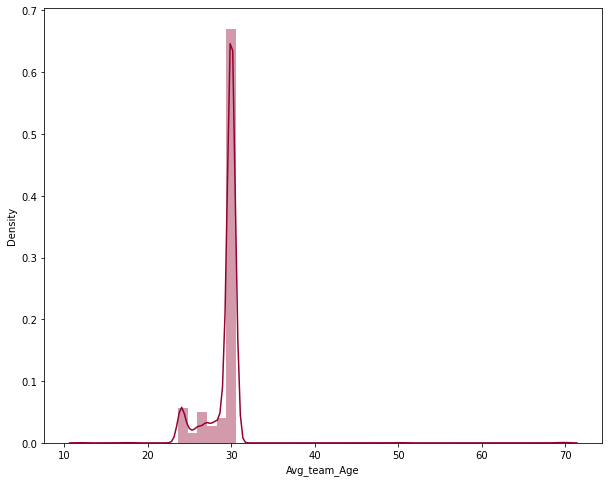

In [30]:
plt.figure(figsize=(10,8))
sns.distplot(df['Avg_team_Age'],color='#93032E')

<AxesSubplot:xlabel='Bowlers_in_team', ylabel='Density'>

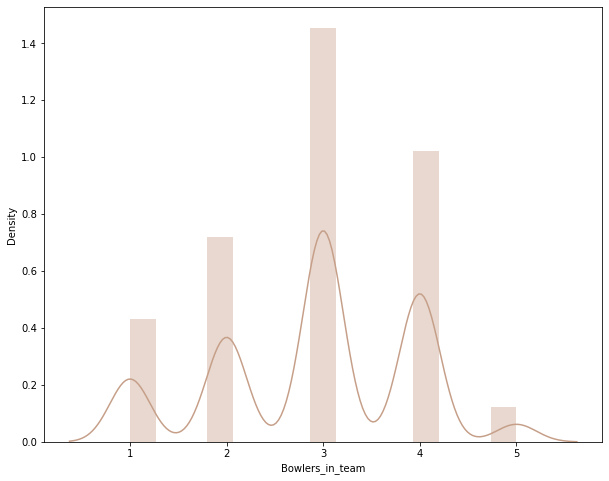

In [31]:
plt.figure(figsize=(10,8))
sns.distplot(df['Bowlers_in_team'],color='#c69f89')

<AxesSubplot:xlabel='Extra_bowls_bowled', ylabel='Density'>

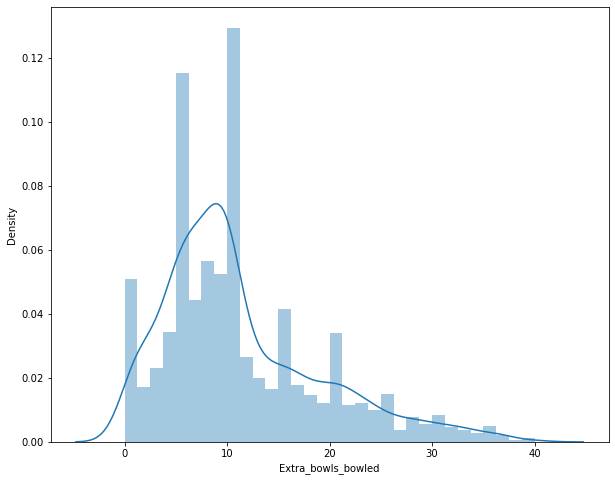

In [32]:
plt.figure(figsize=(10,8))
sns.distplot(df['Extra_bowls_bowled'])

<AxesSubplot:xlabel='player_highest_run', ylabel='Density'>

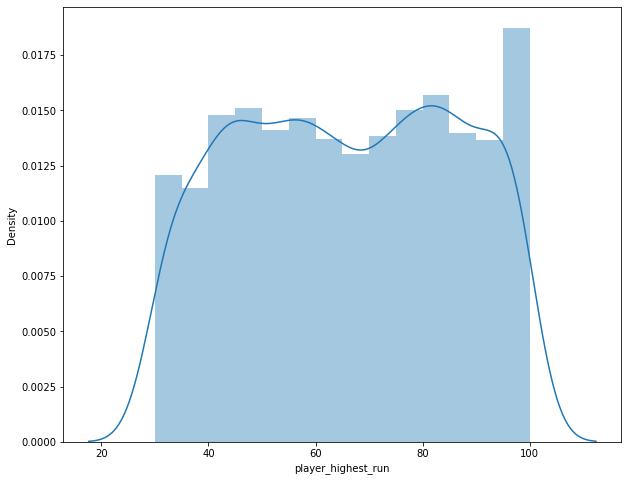

In [33]:
plt.figure(figsize=(10,8))
sns.distplot(df['player_highest_run'])

<AxesSubplot:xlabel='Max_run_given_1over', ylabel='Density'>

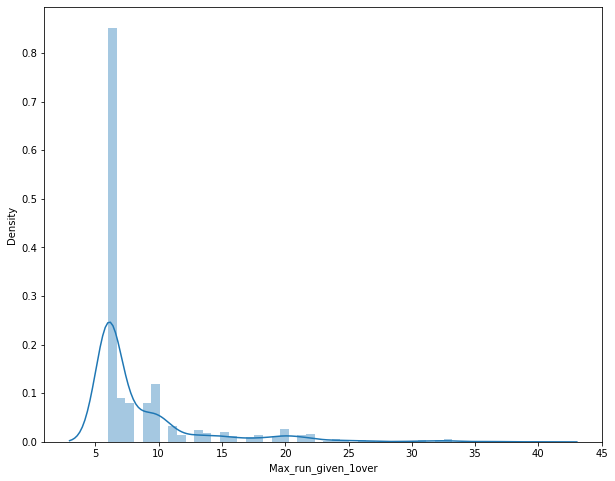

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(df['Max_run_given_1over'])

<AxesSubplot:xlabel='Max_run_scored_1over', ylabel='Density'>

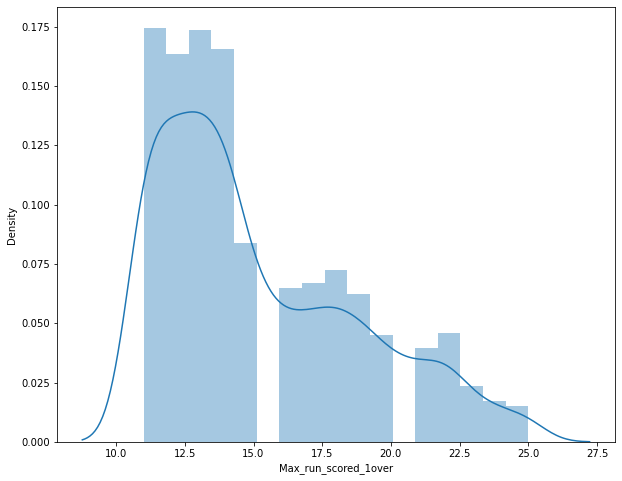

In [35]:
plt.figure(figsize=(10,8))
sns.distplot(df['Max_run_scored_1over'])

<AxesSubplot:xlabel='Max_wicket_taken_1over', ylabel='Density'>

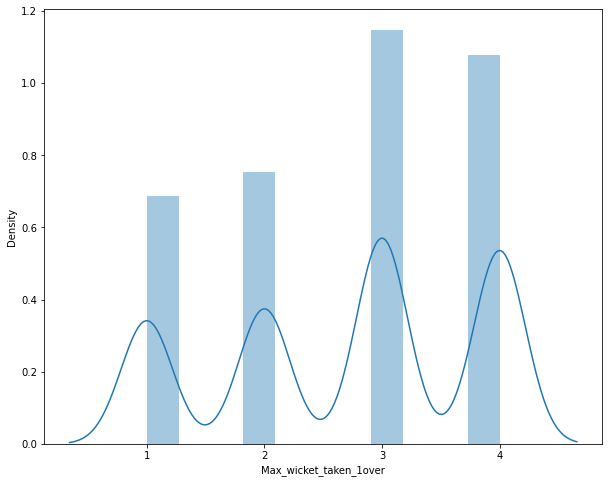

In [36]:
plt.figure(figsize=(10,8))
sns.distplot(df['Max_wicket_taken_1over'])

<AxesSubplot:xlabel='Match_format', ylabel='count'>

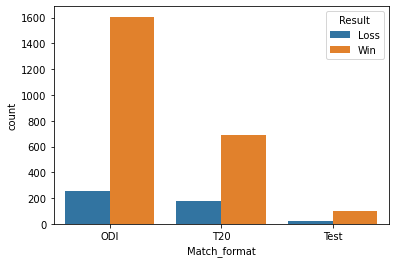

In [37]:

sns.countplot(df["Match_format"],hue=df["Result"]) 

## Outlier detection and treatment

<AxesSubplot:>

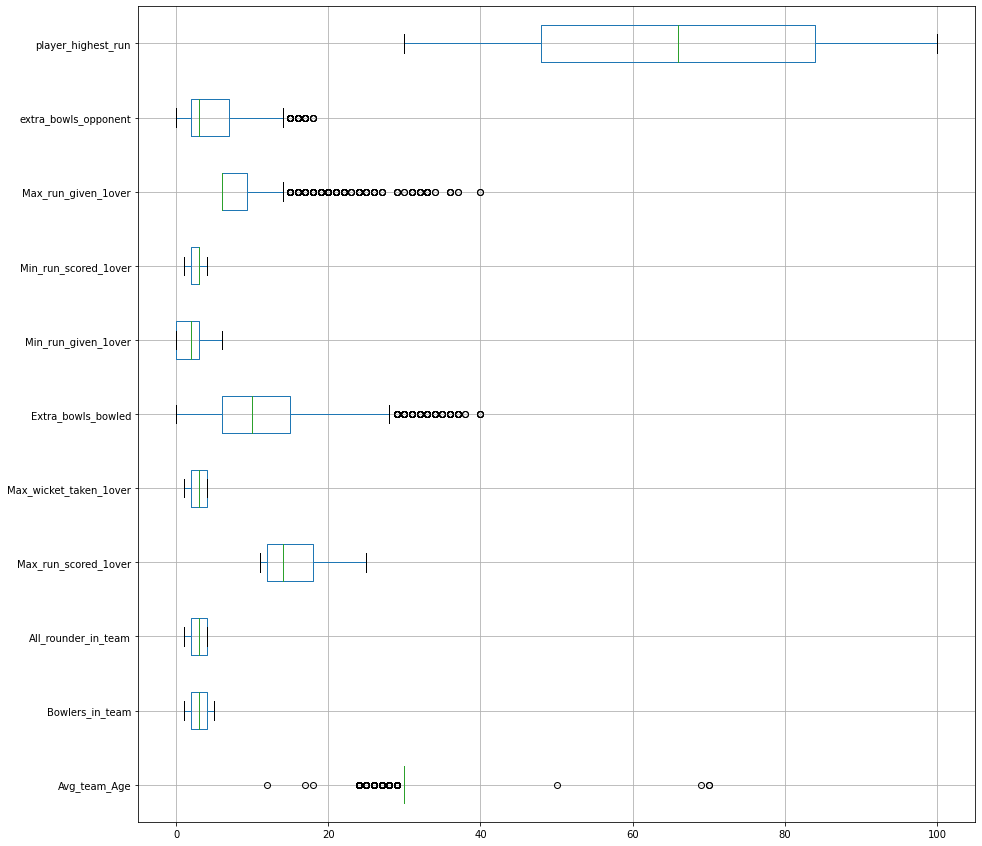

In [38]:
plt.figure(figsize=(15,15))
df[['Avg_team_Age', 'Bowlers_in_team', 'All_rounder_in_team','Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent', 'player_highest_run']].boxplot(vert=0)

In [39]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [40]:
lrextra,urextra=remove_outlier(df['extra_bowls_opponent'])
df['extra_bowls_opponent']=np.where(df['extra_bowls_opponent']>urextra,urextra,df['extra_bowls_opponent'])
df['extra_bowls_opponent']=np.where(df['extra_bowls_opponent']<lrextra,lrextra,df['extra_bowls_opponent'])

lrextra1,urextra1=remove_outlier(df['Extra_bowls_bowled'])
df['Extra_bowls_bowled']=np.where(df['Extra_bowls_bowled']>urextra1,urextra1,df['Extra_bowls_bowled'])
df['Extra_bowls_bowled']=np.where(df['Extra_bowls_bowled']<lrextra1,lrextra1,df['Extra_bowls_bowled'])

lrmaxrun,urmaxrun=remove_outlier(df['Max_run_given_1over'])
df['Max_run_given_1over']=np.where(df['Max_run_given_1over']>urmaxrun,urmaxrun,df['Max_run_given_1over'])
df['Max_run_given_1over']=np.where(df['Max_run_given_1over']<lrmaxrun,lrmaxrun,df['Max_run_given_1over'])

lravg,uravg=remove_outlier(df['Avg_team_Age'])
df['Avg_team_Age']=np.where(df['Avg_team_Age']>uravg,uravg,df['Avg_team_Age'])
df['Avg_team_Age']=np.where(df['Avg_team_Age']<lravg,lravg,df['Avg_team_Age'])

df.shape

(2930, 22)

<AxesSubplot:>

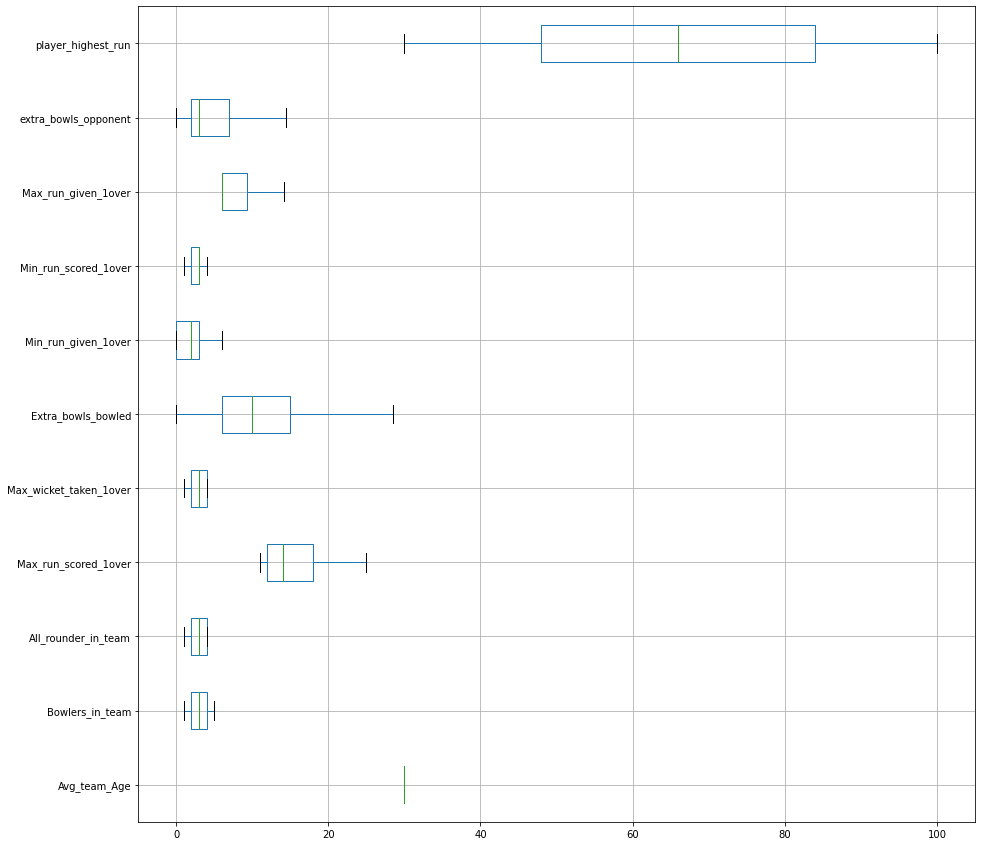

In [41]:
plt.figure(figsize=(15,15))
df[['Avg_team_Age', 'Bowlers_in_team', 'All_rounder_in_team','Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent', 'player_highest_run']].boxplot(vert=0)

## Dropping Audience Number

In [42]:
df.head(2).transpose()

,0,1
Result,Loss,Win
Avg_team_Age,30.0,30.0
Match_light_type,Day,Day
Match_format,ODI,T20
Bowlers_in_team,3.0,3.0
Wicket_keeper_in_team,1,1
All_rounder_in_team,3.0,4.0
First_selection,Bowling,Batting
Opponent,Srilanka,Zimbabwe
Season,Summer,Summer


## Check for Missing Value

In [43]:
df.isnull().sum()[df.isnull().sum()>0]

Avg_team_Age             97
Match_light_type         52
Match_format             70
Bowlers_in_team          82
All_rounder_in_team      40
First_selection          59
Opponent                 36
Season                   62
Offshore                 64
Max_run_scored_1over     28
Extra_bowls_bowled       29
Min_run_scored_1over     27
Max_run_given_1over      34
player_highest_run       28
Batsmen_in_Team         122
dtype: int64

In [44]:
df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

Avg_team_Age            float64
Match_light_type         object
Match_format             object
Bowlers_in_team         float64
All_rounder_in_team     float64
First_selection          object
Opponent                 object
Season                   object
Offshore                 object
Max_run_scored_1over    float64
Extra_bowls_bowled      float64
Min_run_scored_1over    float64
Max_run_given_1over     float64
player_highest_run      float64
Batsmen_in_Team         float64
dtype: object

In [45]:
median1=df["Avg_team_Age"].median()
median2=df["Bowlers_in_team"].median()
median3=df["All_rounder_in_team"].median()
median4=df["Max_run_scored_1over"].median()


df["Avg_team_Age"].replace(np.nan,median1,inplace=True)
df["Bowlers_in_team"].replace(np.nan,median2,inplace=True)
df["All_rounder_in_team"].replace(np.nan,median3,inplace=True)
df["Max_run_scored_1over"].replace(np.nan,median4,inplace=True)
                    

In [46]:
median5=df["Extra_bowls_bowled"].median()
median6=df["Min_run_scored_1over"].median()
median7=df["Max_run_given_1over"].median()
median8=df["player_highest_run"].median()


df["Extra_bowls_bowled"].replace(np.nan,median5,inplace=True)
df["Min_run_scored_1over"].replace(np.nan,median6,inplace=True)
df["Max_run_given_1over"].replace(np.nan,median7,inplace=True)
df["player_highest_run"].replace(np.nan,median8,inplace=True) 

In [47]:
median8=df["Batsmen_in_Team"].median()
df["Batsmen_in_Team"].replace(np.nan,median8,inplace=True)

In [48]:
df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

Match_light_type    object
Match_format        object
First_selection     object
Opponent            object
Season              object
Offshore            object
dtype: object

In [49]:
mode1=df['Match_light_type'].mode().values[0]
mode2=df["Match_format"].mode().values[0]
mode3=df["First_selection"].mode().values[0]
mode4=df["Opponent"].mode().values[0]
mode5=df["Season"].mode().values[0]
mode6=df['Offshore'].mode().values[0]



df["Match_light_type"]=df["Match_light_type"].replace(np.nan,mode1)
df["Match_format"]= df["Match_format"].replace(np.nan,mode2)
df["First_selection"]=df["First_selection"].replace(np.nan,mode3)
df["Opponent"]=df["Opponent"].replace(np.nan,mode4)
df["Season"]=df["Season"].replace(np.nan,mode5)
df["Offshore"]=df["Offshore"].replace(np.nan,mode6)


In [50]:
imp_factor=df[['Avg_team_Age','Bowlers_in_team','All_rounder_in_team', 'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent','Batsmen_in_Team']]

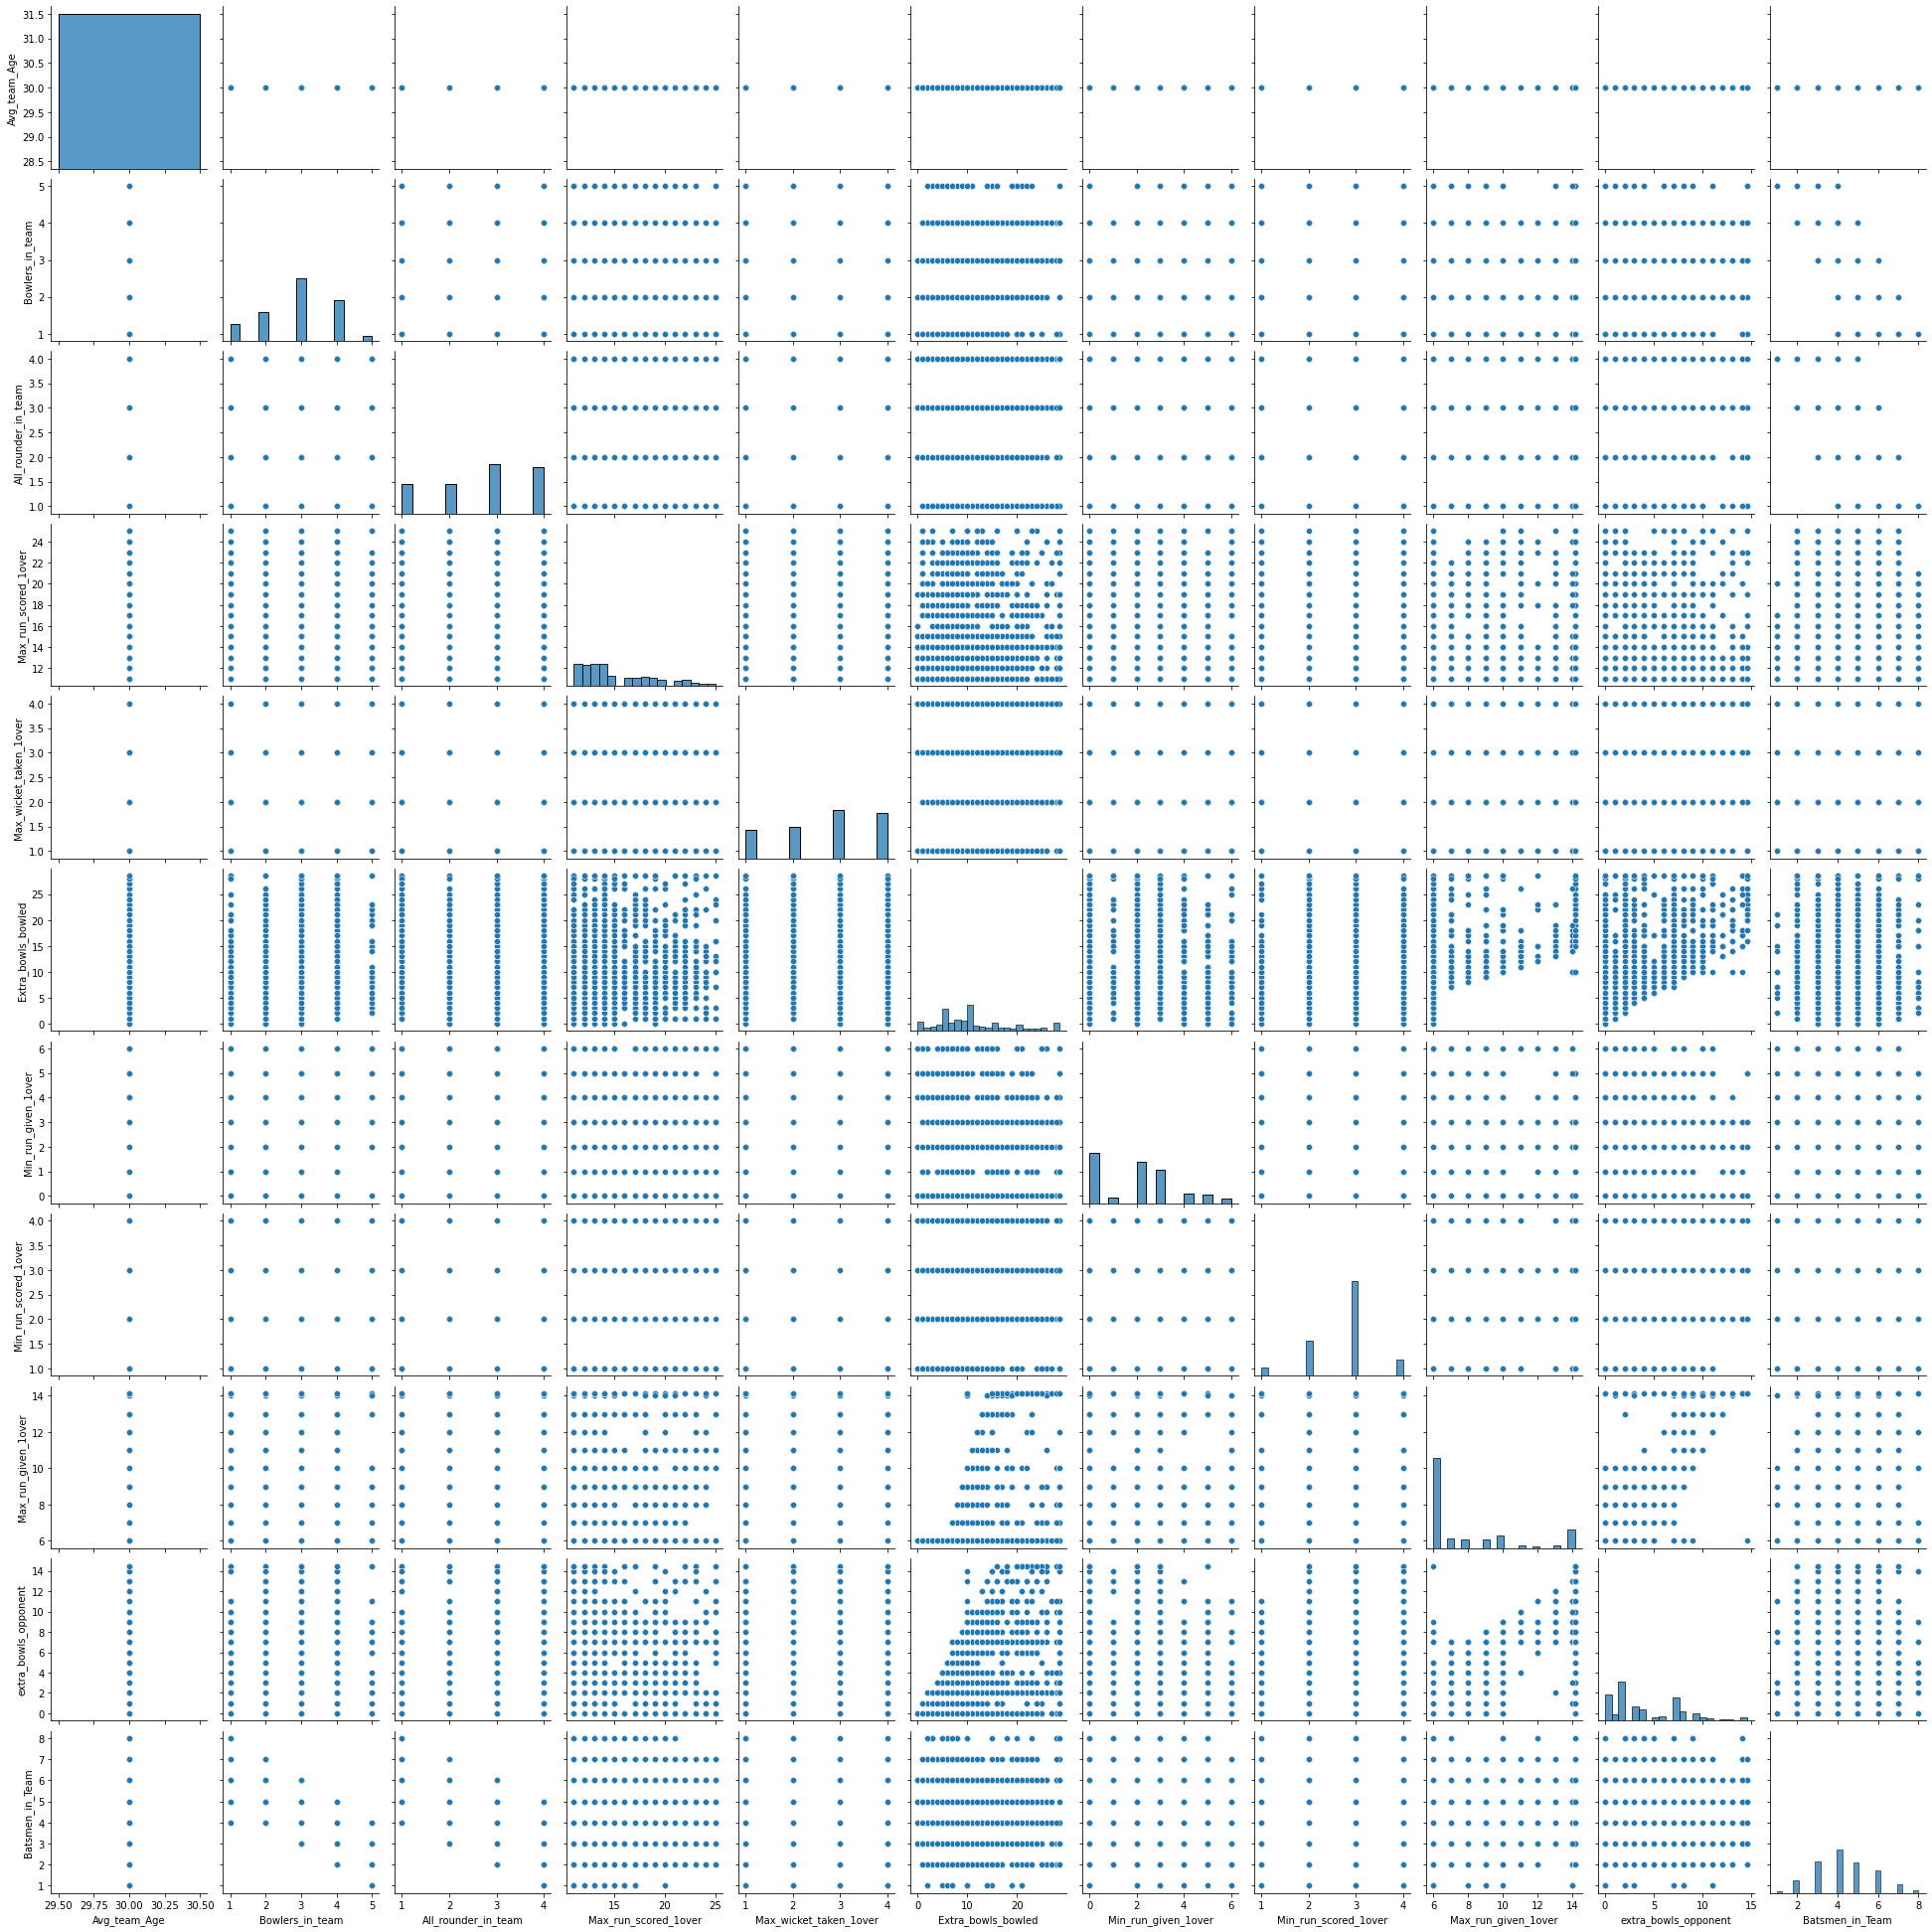

In [51]:
sns.pairplot(imp_factor)

# check correlation among the features

<AxesSubplot:>

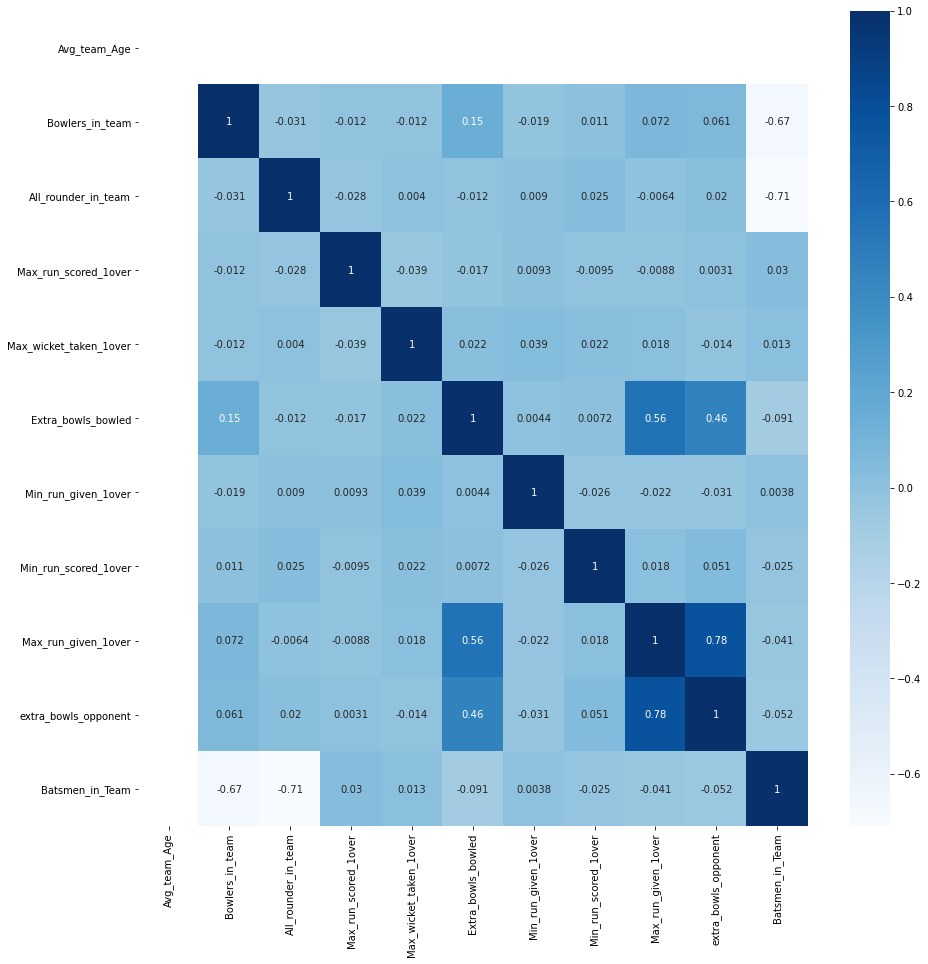

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(imp_factor.corr(), annot=True,cmap='Blues')

In [53]:
df['Result'].head()

0    Loss
1     Win
2    Loss
3     Win
4    Loss
Name: Result, dtype: object

Text(0.5, 1.0, 'Class Distributions')

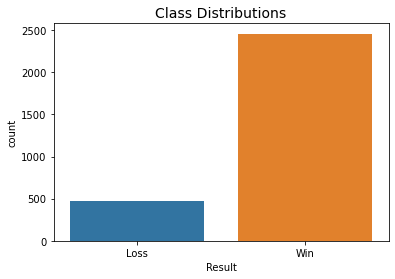

In [54]:

colors = ["#B80C09", "#141301"]
sns.countplot(df['Result'])
plt.title('Class Distributions', fontsize=14)

In [55]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
win = df.loc[df['Result'] == 'Win']
loss = df.loc[df['Result'] == 'Loss'][:473]

normal_distributed_df = pd.concat([loss,win])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,...,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Batsmen_in_Team
1958,Win,30.0,Day,ODI,2.0,1,3.0,Bowling,Srilanka,Rainy,...,3,15.0,2,4.0,7.0,2.0,99.0,3,2,5.0
787,Win,30.0,Night,ODI,3.0,1,3.0,Bowling,Srilanka,Winter,...,3,12.0,4,3.0,12.0,9.0,66.0,3,2,4.0
1344,Win,30.0,Day,ODI,3.0,1,3.0,Bowling,West Indies,Rainy,...,2,25.0,2,3.0,8.0,7.0,96.0,1,5,4.0
2195,Win,30.0,Day,Test,4.0,1,3.0,Bowling,Australia,Rainy,...,3,16.0,1,4.0,9.0,7.0,88.0,3,3,3.0
483,Win,30.0,Day,T20,1.0,1,4.0,Bowling,Zimbabwe,Rainy,...,2,1.0,0,3.0,6.0,0.0,74.0,3,1,5.0


In [56]:
new_df.Result.value_counts()

Win     2457
Loss     473
Name: Result, dtype: int64

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

In [58]:
df_new=df[numerical_features]

In [59]:
X = StandardScaler()
scaled_df = X.fit_transform(df_new)
scaled_df

array([[ 0.        ,  0.08317713,  0.        , ..., -0.62070601,
         1.38944711,  1.13937797],
       [ 0.        ,  0.08317713,  0.        , ..., -0.33961349,
        -0.63717085, -0.2441187 ],
       [ 0.        ,  0.08317713,  0.        , ..., -1.18289104,
         1.68602535,  0.44762964],
       ...,
       [ 0.        ,  0.08317713,  0.        , ..., -1.18289104,
         0.20313416, -0.2441187 ],
       [ 0.        ,  0.08317713,  0.        , ..., -0.62070601,
         0.40085299, -0.93586703],
       [ 0.        ,  0.08317713,  0.        , ..., -0.62070601,
        -0.09344408, -0.2441187 ]])

In [60]:
k_means = KMeans(n_clusters = 3)

In [61]:
k_means.fit(scaled_df)

KMeans(n_clusters=3)

In [62]:
k_means.labels_

array([0, 2, 0, ..., 2, 2, 2])

In [63]:
k_means.inertia_

24308.062485564642

In [64]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

23001.77718961667

In [65]:
wss =[] 

In [66]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

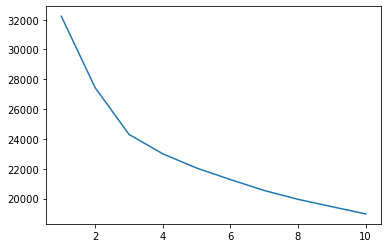

In [67]:
plt.plot(range(1,11), wss)

In [68]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [69]:
df["Clus_kmeans"] = labels
df.head(5)

,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,...,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Batsmen_in_Team,Clus_kmeans
2731,Win,30.0,Day,ODI,3.0,1,1.0,Bowling,Kenya,Winter,...,8.0,1,3.0,6.0,2.0,94.0,2,1,6.0,1
2126,Win,30.0,Night,ODI,3.0,1,3.0,Bowling,Srilanka,Rainy,...,9.0,3,1.0,6.0,3.0,53.0,3,1,4.0,0
2343,Loss,30.0,Night,T20,3.0,1,2.0,Batting,South Africa,Summer,...,22.0,0,2.0,6.0,0.0,100.0,4,4,5.0,1
2291,Win,30.0,Day and Night,T20,2.0,1,2.0,Bowling,South Africa,Rainy,...,10.0,0,3.0,10.0,8.0,48.0,3,2,6.0,1
1215,Loss,30.0,Day,ODI,4.0,1,3.0,Bowling,Srilanka,Winter,...,5.0,2,1.0,6.0,2.0,39.0,2,1,3.0,0


## 1. Model building and interpretation.
a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes) b. Test your predictive model against the test set using various appropriate performance metrics c.Interpretation of the model(s)
10
2. Model Tuning
a.Ensemble modelling, wherever applicable b. Any other model tuning measures(if applicable) c. Interpretation of the most optimum model and its implication on the business
10

## 2. Model Tuning
a.Ensemble modelling, wherever applicable b. Any other model tuning measures(if applicable) c. Interpretation of the most optimum model and its implication on the business

## Decision Tree Model

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes 

In [73]:
X = df.drop("Result",axis=1)

y = df.pop("Result")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [74]:
X_train.shape

(2051, 22)

In [75]:
X_test.shape

(879, 22)

In [76]:
X_train.head()

,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,Offshore,...,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Batsmen_in_Team,Clus_kmeans
1159,30.0,0,2,3.0,1,4.0,0,0,0,0,...,13.0,2,3.0,6.0,4.0,42.0,1,1,3.0,0
2345,30.0,2,1,4.0,1,1.0,1,5,2,0,...,12.0,0,3.0,7.0,7.0,84.0,2,1,5.0,1
537,30.0,0,1,3.0,1,4.0,1,8,2,0,...,2.0,0,3.0,6.0,2.0,83.0,2,0,3.0,0
2580,30.0,0,0,4.0,1,1.0,1,6,1,0,...,10.0,2,2.0,10.0,4.0,37.0,1,1,5.0,1
1584,30.0,0,0,4.0,1,2.0,1,4,0,0,...,11.0,2,3.0,6.0,3.0,48.0,3,2,4.0,0


In [77]:
y_train.head()

1159    1
2345    1
537     1
2580    1
1584    1
Name: Result, dtype: int8

In [78]:
dtree = DecisionTreeClassifier(random_state=123)

In [79]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [80]:
predictions = dtree.predict(X_test)

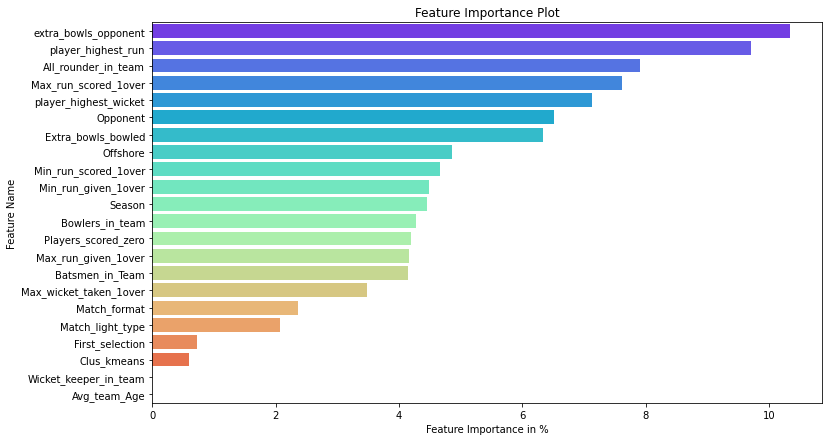

In [81]:
x=pd.DataFrame(dtree.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [82]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [83]:
accuracy_score(y_train,dtree.predict(X_train).round(2))

1.0

In [84]:
accuracy_score(y_test,dtree.predict(X_test).round(2))

0.9283276450511946

In [85]:
roc_auc_score(y_train,dtree.predict_proba(X_train)[:,1]).round(2)

1.0

In [86]:
roc_auc_score(y_test,dtree.predict_proba(X_test)[:,1]).round(2)

0.87

In [87]:
print(classification_report(y_train,dtree.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051



In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       144
           1       0.96      0.96      0.96       735

    accuracy                           0.93       879
   macro avg       0.87      0.87      0.87       879
weighted avg       0.93      0.93      0.93       879



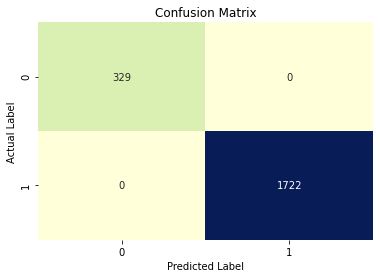

In [89]:
sns.heatmap(confusion_matrix(y_train,dtree.predict(X_train)),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

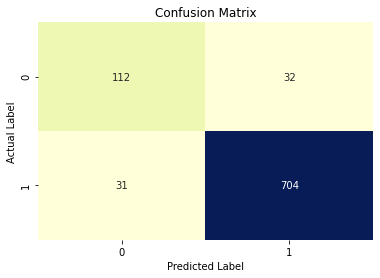

In [90]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [91]:
print('Accuracy Score is',round(accuracy_score(y_test, predictions),2)*100,'%')

Accuracy Score is 93.0 %


In [92]:
print('Area Under the Curve is',round(roc_auc_score(y_test,dtree.predict_proba(X_test)[:,1]),2)*100,'%')

Area Under the Curve is 87.0 %


In [93]:
dt_fpr, dt_tpr,_=roc_curve(y_test,dtree.predict_proba(X_test)[:,1])

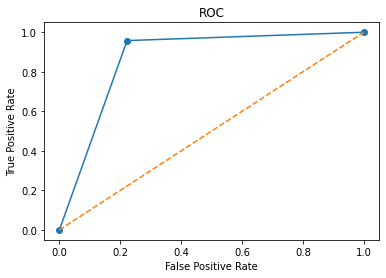

In [94]:
plt.plot(dt_fpr,dt_tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [95]:
param_cart={'max_depth':[3,4,5,8,10],'min_samples_split':[2,3,4,5],'random_state':[100],'max_features':["log2","sqrt"],'criterion':['gini','entropy']}

In [96]:
from sklearn.model_selection import train_test_split,GridSearchCV
best_tree=GridSearchCV(DecisionTreeClassifier(),param_grid=param_cart,cv=5,verbose=True)

In [97]:
best_tree.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 8, 10],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_split': [2, 3, 4, 5],
                         'random_state': [100]},
             verbose=True)

In [98]:
best_tree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 2,
 'random_state': 100}

## Random Forest model

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [101]:
# To understand the differences of different random states affecting Out-of-Bag score
random_state=[0,23,42]
for i in random_state:
    rf=RandomForestClassifier(random_state=i,oob_score=True)
    rf.fit(X_train,train_labels)
    print(rf.oob_score_)

0.9405168210628961
0.9410043881033642
0.9434422233057045


In [102]:
#Build a RandomForestCassifier wit n_estimators 100, max_features 6, andfit it on the training data
rfcl = RandomForestClassifier(n_estimators = 100,max_features=6,random_state=0)
rfcl = rfcl.fit(X_train, train_labels)

In [103]:
rfcl

RandomForestClassifier(max_features=6, random_state=0)

In [104]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [105]:
rfcl.score(X_train,train_labels)

1.0

In [106]:
accuracy_score(y_train,rfcl.predict(X_train).round(2))

0.7342759629449049

In [107]:
accuracy_score(y_test,rfcl.predict(X_test).round(2))

0.7383390216154722

In [108]:
roc_auc_score(y_train,rfcl.predict_proba(X_train)[:,1]).round(2)

0.51

In [109]:
roc_auc_score(y_test,rfcl.predict_proba(X_test)[:,1]).round(2)

0.52

In [110]:
print(classification_report(y_train,rfcl.predict(X_train)))

              precision    recall  f1-score   support

           0       0.17      0.16      0.17       329
           1       0.84      0.84      0.84      1722

    accuracy                           0.73      2051
   macro avg       0.50      0.50      0.50      2051
weighted avg       0.73      0.73      0.73      2051



In [111]:
print(classification_report(y_test,rfcl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.17      0.16      0.17       144
           1       0.84      0.85      0.84       735

    accuracy                           0.74       879
   macro avg       0.51      0.51      0.51       879
weighted avg       0.73      0.74      0.73       879



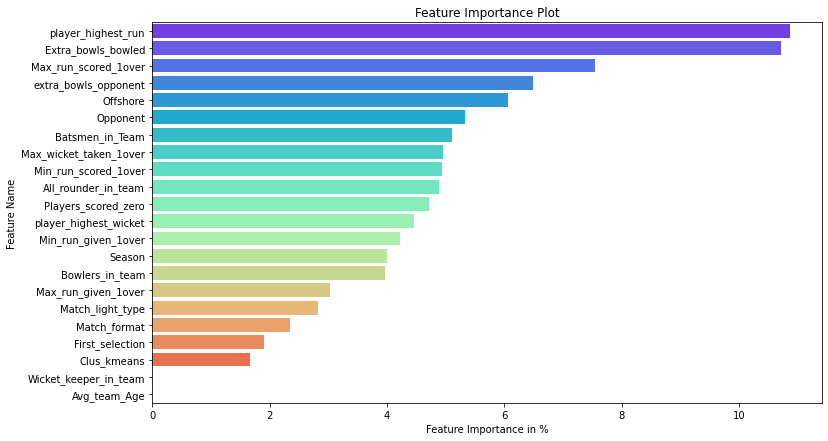

In [112]:
x=pd.DataFrame(rfcl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [113]:
from sklearn.metrics import confusion_matrix,classification_report

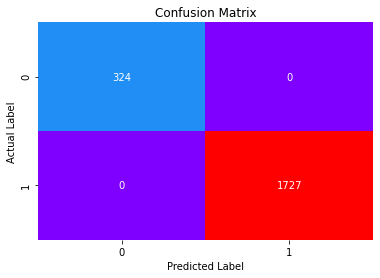

In [114]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [115]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       1.00      1.00      1.00      1727

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051



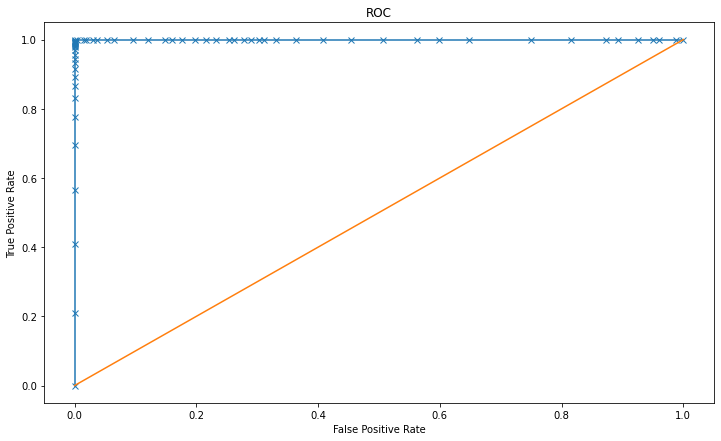

Area under Curve is 1.0


In [116]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,rfcl.predict_proba(X_train)[:,1]))

## Evaluating test data performance

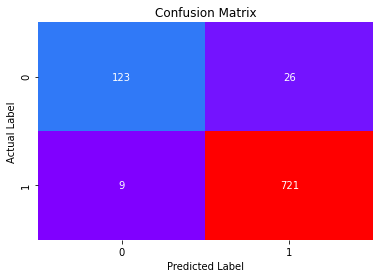

In [117]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [118]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       149
           1       0.97      0.99      0.98       730

    accuracy                           0.96       879
   macro avg       0.95      0.91      0.93       879
weighted avg       0.96      0.96      0.96       879



In [119]:
rfcl.score(X_test,test_labels)

0.9601820250284414

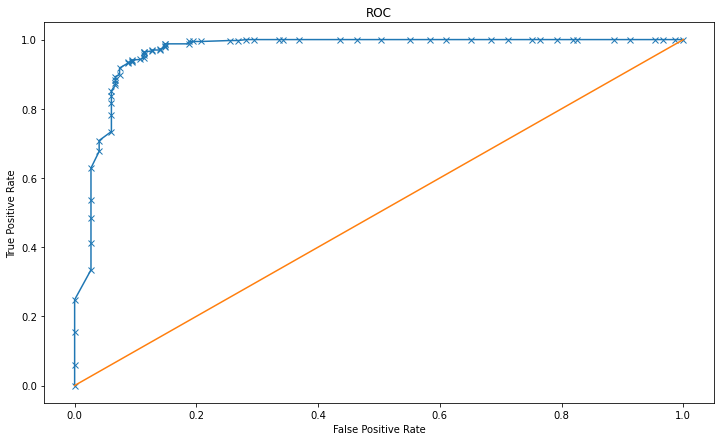

Area under Curve is 0.9645674358738623


In [120]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,rfcl.predict_proba(X_test)[:,1]))

## Logistic regression model

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [122]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8361774744027304
[[  0 144]
 [  0 735]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.84      1.00      0.91       735

    accuracy                           0.84       879
   macro avg       0.42      0.50      0.46       879
weighted avg       0.70      0.84      0.76       879



In [123]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [124]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [125]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.126980,0.873020
1,0.052340,0.947660
2,0.237886,0.762114
3,0.236086,0.763914
4,0.127117,0.872883


In [126]:
model.score(X_train, y_train)

0.8391028766455387

In [127]:
roc_auc_score(y_train,model.predict_proba(X_train)[:,1]).round(2)

0.6

In [128]:
roc_auc_score(y_test,model.predict_proba(X_test)[:,1]).round(2)

0.47

AUC: 0.597


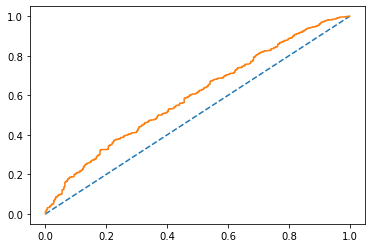

In [129]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [130]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8339021615472128

AUC: 0.597


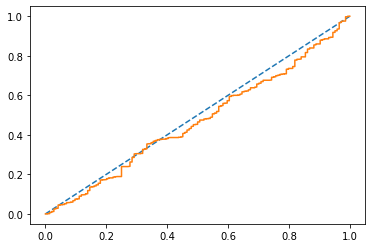

In [131]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [132]:
confusion_matrix(y_train, ytrain_predict)

array([[   0,  329],
       [   1, 1721]], dtype=int64)

In [133]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

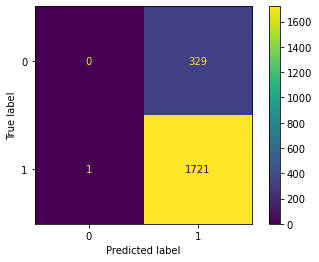

In [134]:
plot_confusion_matrix(model,X_train,y_train);

In [135]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       329
           1       0.84      1.00      0.91      1722

    accuracy                           0.84      2051
   macro avg       0.42      0.50      0.46      2051
weighted avg       0.70      0.84      0.77      2051



In [136]:
confusion_matrix(y_test, ytest_predict)

array([[  2, 142],
       [  4, 731]], dtype=int64)

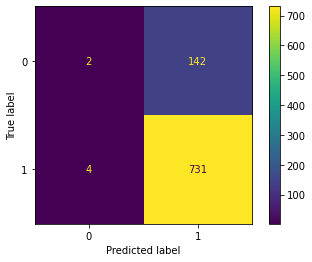

In [137]:
plot_confusion_matrix(model,X_test,y_test);

In [138]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.33      0.01      0.03       144
           1       0.84      0.99      0.91       735

    accuracy                           0.83       879
   macro avg       0.59      0.50      0.47       879
weighted avg       0.75      0.83      0.76       879



In [139]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [140]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [141]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [142]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [143]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [144]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag',
                   tol=1e-05)


In [145]:
best_model = grid_search.best_estimator_

In [146]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [147]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.126998,0.873002
1,0.052352,0.947648
2,0.237917,0.762083
3,0.236077,0.763923
4,0.127127,0.872873


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       329
           1       0.84      1.00      0.91      1722

    accuracy                           0.84      2051
   macro avg       0.42      0.50      0.46      2051
weighted avg       0.70      0.84      0.77      2051
 



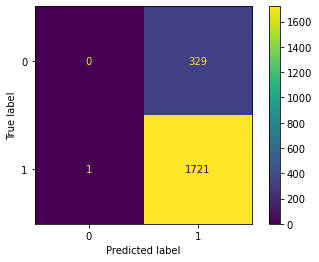

In [148]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.33      0.01      0.03       144
           1       0.84      0.99      0.91       735

    accuracy                           0.83       879
   macro avg       0.59      0.50      0.47       879
weighted avg       0.75      0.83      0.76       879
 



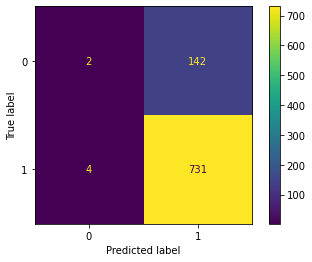

In [149]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

## LDA Model

In [150]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [151]:
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
model2=clf.fit(X_train,y_train)
model2

LinearDiscriminantAnalysis()

In [152]:
ytrain_predict = model2.predict(X_train)

In [153]:
confusion_matrix(y_train, ytrain_predict)

array([[   3,  326],
       [   2, 1720]], dtype=int64)

In [154]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.60      0.01      0.02       329
           1       0.84      1.00      0.91      1722

    accuracy                           0.84      2051
   macro avg       0.72      0.50      0.47      2051
weighted avg       0.80      0.84      0.77      2051



In [155]:
# Accuracy - Training Data
model2.score(X_train, y_train)

0.8400780107264749

AUC: 0.598


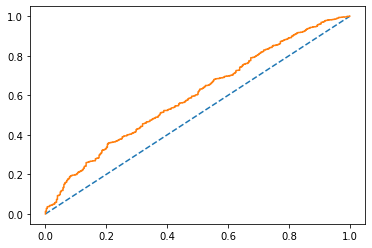

In [156]:
# predict probabilities
probs = model2.predict_proba(X_train)
prob2 = model2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [157]:
ytest_predict = model2.predict(X_test)

In [158]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[  2, 142],
       [  4, 731]], dtype=int64)

In [159]:
#Test Data Accuracy
test_acc=model2.score(X_test,y_test)
test_acc

0.8339021615472128

AUC: 0.598


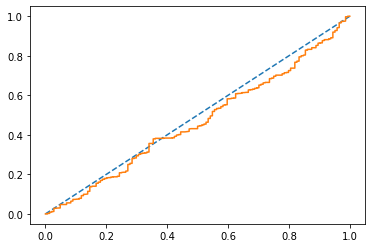

In [160]:
# predict probabilities
probs = model2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [161]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.33      0.01      0.03       144
           1       0.84      0.99      0.91       735

    accuracy                           0.83       879
   macro avg       0.59      0.50      0.47       879
weighted avg       0.75      0.83      0.76       879



In [162]:
from sklearn.model_selection import RepeatedStratifiedKFold
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# Init the Model
lda = LinearDiscriminantAnalysis()

# Init Grid Search Class
model = GridSearchCV(lda, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# Do the Grid Search
model3=model.fit(X_train,y_train)
model3

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [163]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


In [164]:
from xgboost import XGBClassifier

In [165]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [166]:
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [167]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [168]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8395904436860068
Accuracy on test set :  0.8361774744027304
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8395904436860068
Precision on test set :  0.8361774744027304


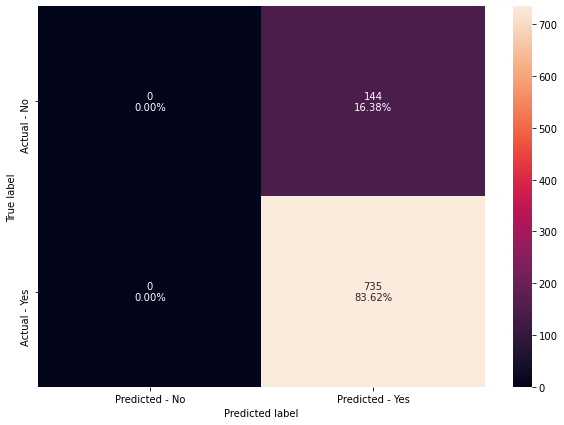

In [169]:
make_confusion_matrix(abc,y_test)

In [170]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train) 

GradientBoostingClassifier(random_state=1)

In [171]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8454412481716236
Accuracy on test set :  0.825938566552901
Recall on training set :  1.0
Recall on test set :  0.9850340136054422
Precision on training set :  0.8445316331535067
Precision on test set :  0.836027713625866


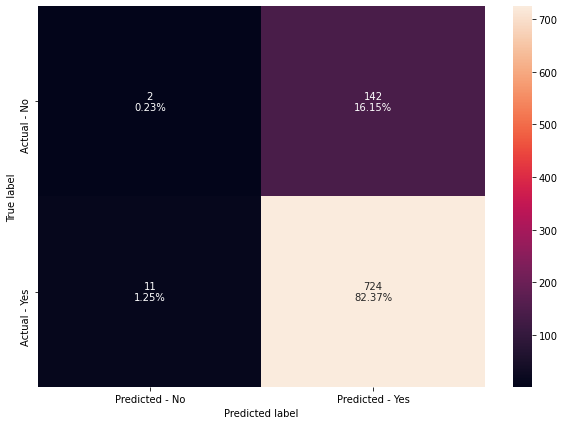

In [172]:
make_confusion_matrix(gbc,y_test)

In [173]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [174]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9263773768893223
Accuracy on test set :  0.7497155858930603
Recall on training set :  0.9883855981416957
Recall on test set :  0.8721088435374149
Precision on training set :  0.928532460447354
Precision on test set :  0.8357235984354628


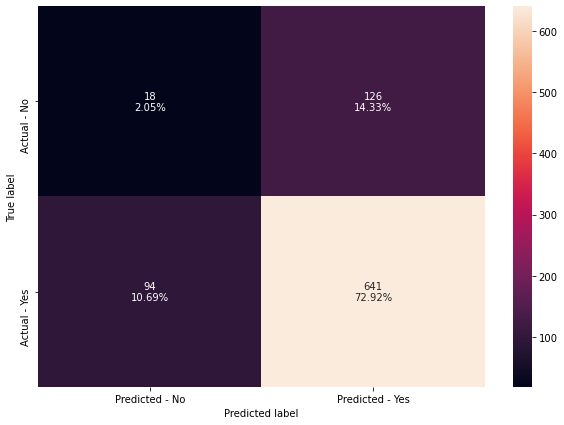

In [175]:
make_confusion_matrix(xgb,y_test)

In [176]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [177]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.8395904436860068
Accuracy on test set :  0.8361774744027304
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8395904436860068
Precision on test set :  0.8361774744027304


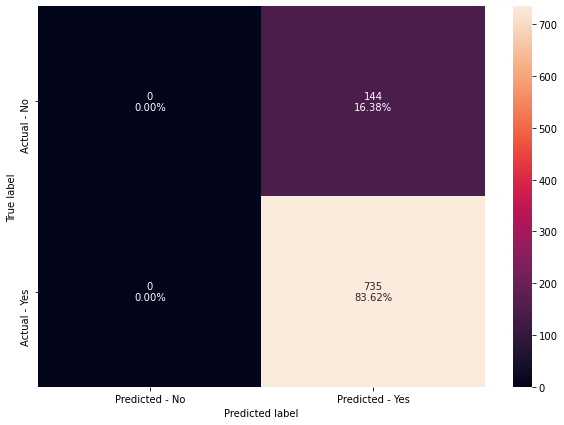

In [178]:
make_confusion_matrix(abc_tuned,y_test)

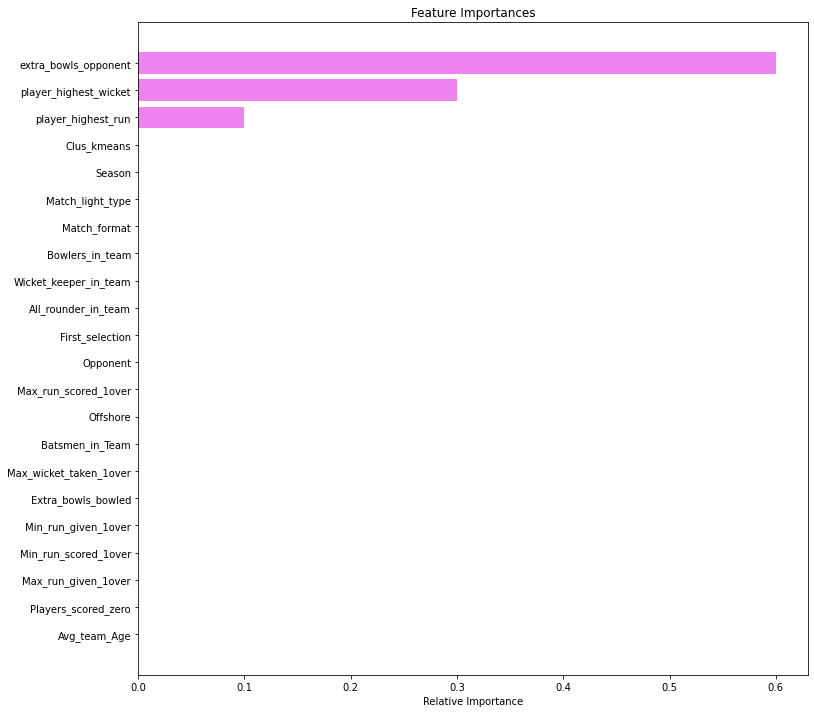

In [179]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [180]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [181]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8459288152120916
Accuracy on test set :  0.825938566552901
Recall on training set :  1.0
Recall on test set :  0.9850340136054422
Precision on training set :  0.844946025515211
Precision on test set :  0.836027713625866


In [182]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=0.8)

In [183]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.8395904436860068
Accuracy on test set :  0.8361774744027304
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8395904436860068
Precision on test set :  0.8361774744027304


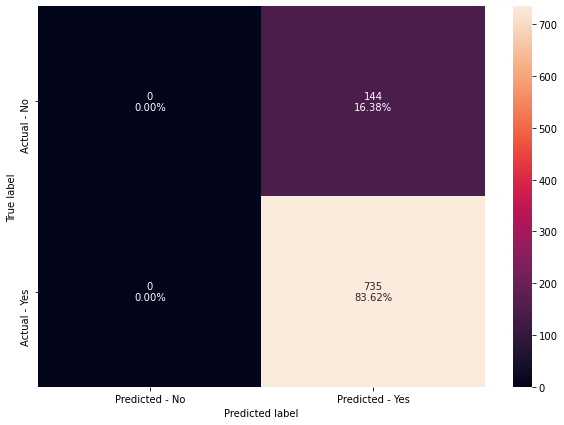

In [184]:
make_confusion_matrix(gbc_tuned,y_test)

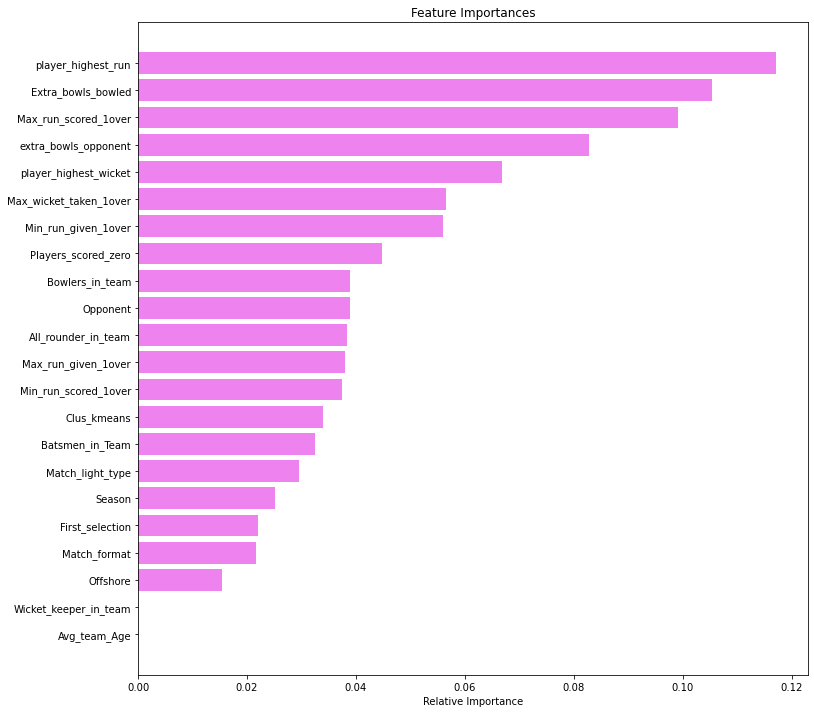

In [185]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [186]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [187]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.8395904436860068
Accuracy on test set :  0.8361774744027304
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8395904436860068
Precision on test set :  0.8361774744027304


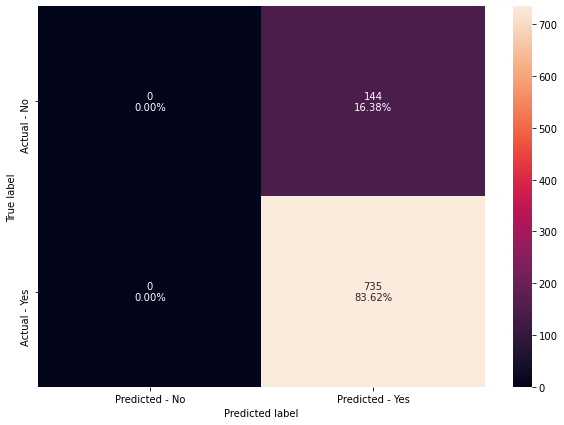

In [188]:
make_confusion_matrix(xgb_tuned,y_test)

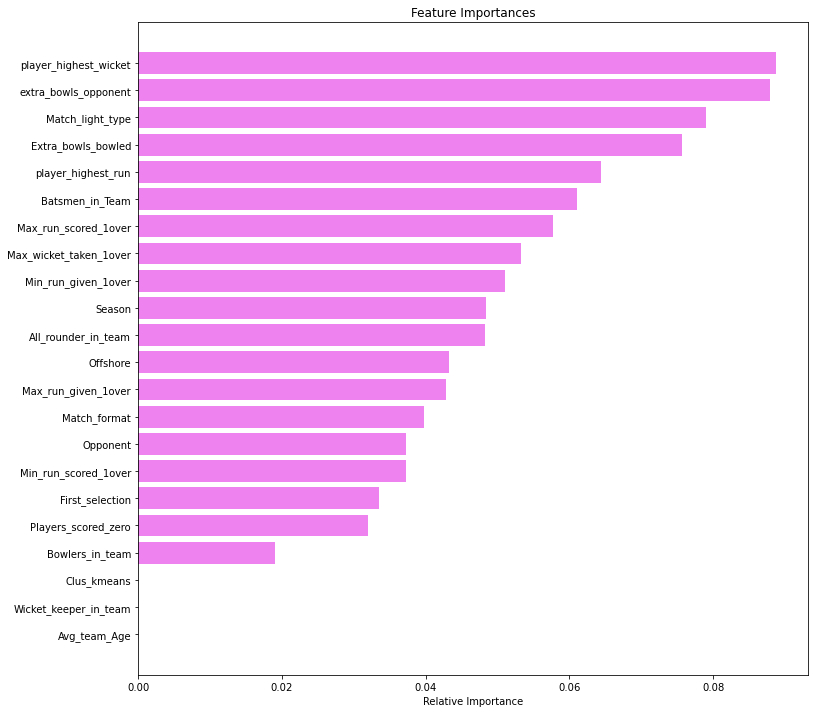

In [189]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [190]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [191]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.84,0.84,1.00,1.00,0.84,0.84
1,AdaBoost Tuned,0.84,0.84,1.00,1.00,0.84,0.84
2,Gradient Boosting with default parameters,0.85,0.83,1.00,0.99,0.84,0.84
3,Gradient Boosting with init=AdaBoost,0.85,0.83,1.00,0.99,0.84,0.84
4,Gradient Boosting Tuned,0.84,0.84,1.00,1.00,0.84,0.84
5,XGBoost with default parameters,0.93,0.75,0.99,0.87,0.93,0.84
6,XGBoost Tuned,0.84,0.84,1.00,1.00,0.84,0.84
